In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [143]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [12]:
if os.name=='nt':
    !pip install wget
    import wget

In [13]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [14]:
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.


tar: This does not look like a tar archive
tar: Skipping to next header
tar: Exiting with failure status due to previous errors


        1 file(s) copied.
running build
running build_py
copying object_detection\anchor_generators\flexible_grid_anchor_generator.py -> build\lib\object_detection\anchor_generators
copying object_detection\anchor_generators\grid_anchor_generator.py -> build\lib\object_detection\anchor_generators
copying object_detection\builders\anchor_generator_builder.py -> build\lib\object_detection\builders
copying object_detection\builders\model_builder.py -> build\lib\object_detection\builders
copying object_detection\core\box_list.py -> build\lib\object_detection\core
copying object_detection\core\keypoint_ops.py -> build\lib\object_detection\core
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detect

C:\Users\nadyu\anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\Users\nadyu\anaconda3\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
C:\Users\nadyu\anaconda3\lib\site-packages\pkg_resources\__init__.py:122: PkgResourcesDeprecationWarning: 2004d is an invalid version and will not be supported in a future release
  warnings.warn(
C:\Users\nadyu\anaconda3\lib\site-packages\pkg


copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\flexible_grid_anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\fpn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\graph_rewriter_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\grid_anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\hyperparams_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\image_resizer_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\input_reader_pb2.py -> build\lib\object_detection\protos
co

byte-compiling build\bdist.win-amd64\egg\object_detection\protos\eval_pb2.py to eval_pb2.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\protos\faster_rcnn_box_coder_pb2.py to faster_rcnn_box_coder_pb2.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\protos\faster_rcnn_pb2.py to faster_rcnn_pb2.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\protos\flexible_grid_anchor_generator_pb2.py to flexible_grid_anchor_generator_pb2.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\protos\fpn_pb2.py to fpn_pb2.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\protos\graph_rewriter_pb2.py to graph_rewriter_pb2.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\protos\grid_anchor_generator_pb2.py to grid_anchor_generator_pb2.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\protos\hyperparams_pb2.py to hyperparams_pb2.cpython-39.pyc
by

Obtaining file:///C:/Users/nadyu/PycharmProjects/mold_detector/tfod/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [15]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.12: C:\Users\nadyu\anaconda3\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-01-12 12:46:50.143222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-12 12:46:51.574820: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1670 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
C:\Users\nadyu\anaconda3\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC met

I0112 12:47:22.376166 17592 efficientnet_model.py:143] round_filter input=80 output=96
I0112 12:47:22.376166 17592 efficientnet_model.py:143] round_filter input=112 output=136
I0112 12:47:23.471114 17592 efficientnet_model.py:143] round_filter input=112 output=136
I0112 12:47:23.471114 17592 efficientnet_model.py:143] round_filter input=192 output=232
I0112 12:47:24.769415 17592 efficientnet_model.py:143] round_filter input=192 output=232
I0112 12:47:24.769415 17592 efficientnet_model.py:143] round_filter input=320 output=384
I0112 12:47:25.248002 17592 efficientnet_model.py:143] round_filter input=1280 output=1536
I0112 12:47:25.341451 17592 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.2, depth_coefficient=1.4, resolution=300, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), B

In [148]:
import object_detection

In [149]:
!pip list

Package                             Version              Editable project location
----------------------------------- -------------------- ---------------------------------------------------------------------------------
absl-py                             1.3.0
aiohttp                             3.8.1
aiosignal                           1.2.0
alabaster                           0.7.12
alembic                             1.8.1
anaconda-client                     1.9.0
anaconda-navigator                  2.1.4
anaconda-project                    0.10.2
anyio                               3.5.0
apache-airflow                      2.4.0
apache-airflow-providers-common-sql 1.2.0
apache-airflow-providers-ftp        3.1.0
apache-airflow-providers-http       4.0.0
apache-airflow-providers-imap       3.0.0
apache-airflow-providers-sqlite     3.2.1
apache-beam                         2.44.0rc1
apispec                             3.3.2
appdirs                             1.4.4
argcomplete     

In [16]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [151]:

labels = [{'name':'Acremonium', 'id':1}, {'name':'Alternaria', 'id':2}, {'name':'Aspergillus', 'id':3}, {'name':'Cladosporium', 'id':4}, {'name':'Fusarium', 'id':5}, {'name':'Mucor', 'id':6}, {'name':'Penicillium', 'id':7}, {'name':'Trichoderma', 'id':8}, {'name':'Trichophyton', 'id':9}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [152]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [153]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [154]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}


        1 file(s) copied.


In [155]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [156]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])


In [157]:
config


{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [158]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [159]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]


In [160]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [161]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')


In [162]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])


In [163]:
print(command)


python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [108]:
!{command}

2023-01-11 21:38:28.321995: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0111 21:38:28.322852 28048 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0111 21:38:28.322852 28048 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 2000
I0111 21:38:28.338484 28048 config_util.py:552] Maybe overwriting train_steps: 2000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0111 21:38:28.338484 28048 config_util.py:552] Maybe overwriting use_bfloat16: False
Instr

In [66]:
from pathlib import Path
import imghdr

data_dir = "C:\\Users\\nadyu\\PycharmProjects\\mold_detector\\tfod\\Tensorflow\\workspace\\images\\train"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [129]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])


In [130]:
print(command)


python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [131]:
!{command}


Traceback (most recent call last):
  File "C:\Users\nadyu\PycharmProjects\mold_detector\tfod\Tensorflow\models\research\object_detection\model_main_tf2.py", line 30, in <module>
    import tensorflow.compat.v2 as tf
  File "C:\Users\nadyu\anaconda3\lib\site-packages\tensorflow\__init__.py", line 51, in <module>
    from ._api.v2 import compat
  File "C:\Users\nadyu\anaconda3\lib\site-packages\tensorflow\_api\v2\compat\__init__.py", line 37, in <module>
    from . import v1
  File "C:\Users\nadyu\anaconda3\lib\site-packages\tensorflow\_api\v2\compat\v1\__init__.py", line 30, in <module>
    from . import compat
  File "C:\Users\nadyu\anaconda3\lib\site-packages\tensorflow\_api\v2\compat\v1\compat\__init__.py", line 37, in <module>
    from . import v1
  File "C:\Users\nadyu\anaconda3\lib\site-packages\tensorflow\_api\v2\compat\v1\compat\v1\__init__.py", line 31, in <module>
    from tensorflow._api.v2.compat.v1 import config
  File "C:\Users\nadyu\anaconda3\lib\site-packages\tensorflow\

In [ ]:
python Tensorflow\\models\\research\\object_detection\\model_main_tf2.py --model_dir=Tensorflow\\workspace\\models\\my_ssd_mobnet --pipeline_config_path=Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config --checkpoint_dir=Tensorflow\\workspace\\models\\my_ssd_mobnet

In [27]:
pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:

import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [6]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [7]:

import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])


In [9]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'train', '1_trichoderma_x.jpg')

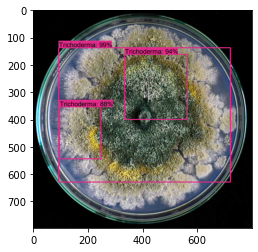

In [10]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()